In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

LOAD THE DOWNLOADED CSV FILE

In [ ]:
data = pd.read_csv('files/airline-passengers.csv')
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


converting the data into numpy array form

In [ ]:
data = data['Passengers'].values.reshape(-1, 1)

Normalizing the data

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)

Splitting the data into train and test data

In [ ]:
train_data = data[:int(len(data)*0.7)]
test_data = data[int(len(data)*0.7):]

Creating a function

In [ ]:
def create_dataset(data, window_size):
    X, y = [],[]
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

window_size = 10
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

BUilding the RNN Model

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

Compiling the model

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

Train the model using train data

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 0.2269
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0894
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0613
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0725
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0394
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0374
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0385
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0266
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0293
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0375
Epoch 11/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0287
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0226
Epoch 13/100
3/3 [==============================] - 0s 4ms/st

In [ ]:
prediction = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


The output is not correct so will have to reverse the process

In [ ]:
prediction

array([[0.46159583],
       [0.55123776],
       [0.59800345],
       [0.63721824],
       [0.66018635],
       [0.6889543 ],
       [0.67878526],
       [0.5423225 ],
       [0.452324  ],
       [0.40898198],
       [0.50672835],
       [0.51266366],
       [0.4877328 ],
       [0.6126495 ],
       [0.6725457 ],
       [0.7218815 ],
       [0.6997916 ],
       [0.75584984],
       [0.73710185],
       [0.60972786],
       [0.5063769 ],
       [0.46994144],
       [0.6054547 ],
       [0.6108313 ],
       [0.56928295],
       [0.6279158 ],
       [0.765654  ],
       [0.81799096],
       [0.8120659 ],
       [0.8486267 ],
       [0.81837004],
       [0.7010738 ],
       [0.59719074]], dtype=float32)

we are reversing the process

In [ ]:
prediction = scaler.inverse_transform(prediction)

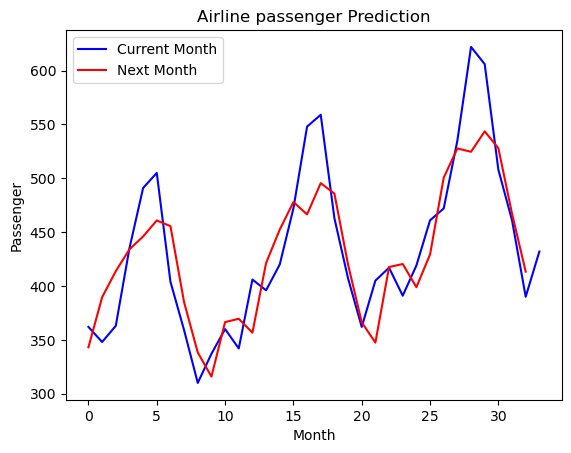

In [ ]:
plt.plot(scaler.inverse_transform(test_data[window_size:]), color='blue', label='Current Month')
plt.plot(prediction, color='red', label='Next Month')
plt.title('Airline passenger Prediction')
plt.xlabel('Month')
plt.ylabel('Passenger')
plt.legend()
plt.show()

In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
3/3 [==============================] - 1s 3ms/step - loss: 0.0046
Epoch 2/50
3/3 [==============================] - 0s 4ms/step - loss: 0.0046
Epoch 3/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 4/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 5/50
3/3 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 6/50
3/3 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 7/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 8/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 9/50
3/3 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 10/50
3/3 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 11/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 12/50
3/3 [==============================] - 0s 4ms/step - loss: 0.0044
Epoch 13/50
3/3 [==============================] - 0s 4ms/step - loss: 0.

In [ ]:
predictions = model.predict(X_test)

2/2 [==============================] - 0s 1ms/step


In [ ]:
predictions = scaler.inverse_transform(predictions)

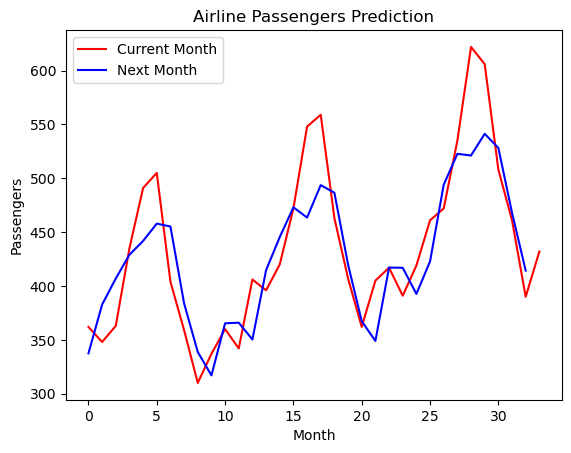

In [ ]:
# Plot the results
plt.plot(scaler.inverse_transform(test_data[window_size:]), color='red', label='Current Month')
plt.plot(predictions, color='blue', label='Next Month')
plt.title('Airline Passengers Prediction')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()